In [5]:
import numpy as np
import glob
import matplotlib.pyplot as plt, mpld3

### Utility functions

In [6]:
from scipy.optimize import curve_fit

def gaussian(x,A,wc,g): #(input, area under peak, center energy, HWHM )
    return (A/(np.sqrt(2*np.pi)*g)) * np.exp(-(x-wc)**2 / (2*g**2))

def lorentzian(x,A,wc,g):
    return (A/(1 + ((x-wc)/g)**2)) / (np.pi*g)

def pseudoVoigt(x,A,wc,g,f): #(1, peak_value, std_dev, 1)
    return f*lorentzian(x,A,wc,g)+(1-f)*gaussian(x,A,wc,g/np.sqrt(2*np.log(2)))

def bkg(x,y0,m):
    return m*x+y0

def comptonProfile(x,A,wc,g,f,y0):
    return bkg(x,y0,m)+pseudoVoigt(x,A,wc,g,f)

def comptonFit(x, y):
    peak_index = np.argmax(y)
    peak_value = x[peak_index]
    poissonError = np.sqrt(y)
    std_dev = np.sqrt(sum((x - peak_value) ** 2) / (sum(y)-1)) #sample standard deviation
    peak_Area = sum(input_y)
    print(peak_Area, peak_value, peak_index, std_dev)
    popt, pcov = curve_fit(comptonProfile, x, y, p0=[peak_Area, peak_value, std_dev, 1, -1, 10], sigma = poissonError, maxfev=5000)
    return popt, pcov


### Calibrations and background

In [7]:
# Calibration
m = 0.8741586926259176
b = -10.031221336877318
# Changed Gain
m_new = 0.8398160567649131
b_new = -9.016848123325374

# Load Background
background =np.loadtxt('Calibrations/BackgroundRadiation40gain610volts120sec.Spe',skiprows=12, max_rows=1023)

In [8]:
# Backgrounds for each angle
calibration_files = glob.glob('Calibrations/CesiumNoTarget*.Spe')
calibrations = {}

for f in calibration_files:
    angle = f.split('CesiumNoTarget')[1].split('degrees')[0]
    time = f.split('volts')[1].split('sec')[0]
    data = np.loadtxt(f,skiprows=12, max_rows=1023)
    entry = {'filename':f, 'time':time,'data':data}
    calibrations[angle] = entry

calibrations['0'] = {'Calibrations/BackgroundRadiation40gain610volts120sec.Spe':f, 'time':120,'data':background}

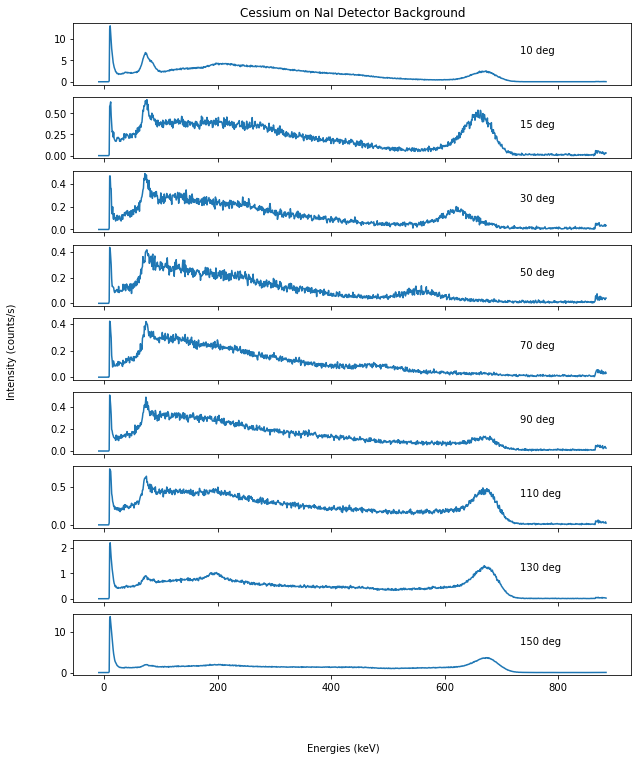

In [10]:
f, axes = plt.subplots(9, 1, sharex=True, figsize=(10,12))
axes[0].set_title('Cessium on NaI Detector Background')
# ax7.set_xlabel('Energies (keV)')
# Make common axis labels
f.text(0.5, 0.04, 'Energies (keV)', va='center', ha='center')
f.text(0.04, 0.5, 'Intensity (counts/s)', va='center', ha='center', rotation='vertical')
angles = ['10','15','30','50','70','90','110','130','150']
bins = np.linspace(1,1023,1023)
for i in range(len(angles)):
    axes[i].plot(bins*m+b,calibrations[angles[i]]['data']/int(calibrations[angles[i]]['time']))
    axes[i].annotate(angles[i]+' deg', (0.8,0.5), xycoords='axes fraction')

# Lead

In [15]:
# Load files

pb_files = glob.glob('Cesium_Lead/*.Spe')
cs_pb_dict = {}

for f in pb_files:
    angle = f.split('CesiumPb')[1].split('degrees')[0]
    time = int(f.split('volts')[1].split('sec')[0])
    data = np.loadtxt(f,skiprows=12, max_rows=1023)
    entry = {'filename':f, 'time':time,'data':data}
    cs_pb_dict[angle] = entry

In [165]:
# Select compton peaks to fit 

cs_pb_dict['0']['x1'] = 650
cs_pb_dict['0']['x2'] = 850

cs_pb_dict['5']['x1'] = 450
cs_pb_dict['5']['x2'] = 850

cs_pb_dict['10']['x1'] = 600
cs_pb_dict['10']['x2'] = 750

cs_pb_dict['15']['x1'] = 550
cs_pb_dict['15']['x2'] = 760

# cs_pb_dict['20']['x1'] = 600
# cs_pb_dict['20']['x2'] = 800

# cs_pb_dict['25']['x1'] = 600
# cs_pb_dict['25']['x2'] = 800

cs_pb_dict['30']['x1'] = 350
cs_pb_dict['30']['x2'] = 800

cs_pb_dict['50']['x1'] = 350
cs_pb_dict['50']['x2'] = 570

cs_pb_dict['70']['x1'] = 320
cs_pb_dict['70']['x2'] = 450

cs_pb_dict['90']['x1'] = 250
cs_pb_dict['90']['x2'] = 400

cs_pb_dict['110']['x1'] = 200
cs_pb_dict['110']['x2'] = 350

cs_pb_dict['130']['x1'] = 150
cs_pb_dict['130']['x2'] = 300

cs_pb_dict['150']['x1'] = 150
cs_pb_dict['150']['x2'] = 300

from scipy.optimize import curve_fit

def gaussian(x,A,wc,g): #(input, area under peak, center energy, HWHM )
    return (A/(np.sqrt(2*np.pi)*g)) * np.exp(-(x-wc)**2 / (2*g**2))

def lorentzian(x,A,wc,g):
    return (A/(1 + ((x-wc)/g)**2)) / (np.pi*g)

def pseudoVoigt(x,A,wc,g,f): #(1, peak_value, std_dev, 1)
    return f*lorentzian(x,A,wc,g)+(1-f)*gaussian(x,A,wc,g/np.sqrt(2*np.log(2)))

def bkg(x,y0,m0):
    return m0*x+y0

def gaussProfile(x,A,wc,g,m0,y0):
    return bkg(x,y0,m0)+gaussian(x,A,wc,g)

def gaussFit(x, y, poissonError):
    peak_index = np.argmax(y)
    peak_value = x[peak_index]
    std_dev = np.sqrt(sum((x - peak_value) ** 2) / (sum(y)-1)) #sample standard deviation
    peak_Area = sum(y)
    print('area: ',peak_Area,'peak energy: ', peak_value, 'peak index: ', peak_index,'std', std_dev)
    popt, pcov = curve_fit(gaussProfile, x, y, p0=[peak_Area, peak_value, std_dev,1,0], sigma = poissonError, maxfev=5000)
    return popt, pcov
    

In [166]:
pb_data = []

In [295]:
%matplotlib qt
bins = np.linspace(1,1023,1023)
angle = '15'

for angle in ['10','15','30','50','70','90','110']:
    entry = cs_pb_dict[angle]

    scale = int(calibrations[angle]['time']) / int(entry['time']) 
    # scale = 377 / 110
    scaled_data = entry['data'] * scale
    bg = calibrations[angle]['data']

    x1 = entry['x1']
    x2 = entry['x2']

    input_x = bins
    # input_y = entry['data']
    if angle in ['10','15','30','130','150']:
        input_y = scaled_data
    else:    
        input_y = scaled_data - bg

    # Select peak to fit
    xdata = input_x[x1:x2]
    ydata = input_y[x1:x2]

    # Plot input spectra with correct scaling
    plt.figure(figsize=(10,5))
    plt.plot(input_x*m+b,scaled_data - bg, label='Subtracted Spectra')
    plt.plot(input_x*m+b,scaled_data, label='Scaled Spectra')
    plt.plot(input_x*m_new+b_new, bg, label='Background')
    # Plot selected peak to fit
    plt.plot(xdata*m+b, ydata, label='Selected Peak')

    poissonErr = np.sqrt(scaled_data[x1:x2])
    [A,wc,g,m0,y0],pcov = gaussFit(xdata, ydata, poissonErr)
    # [A_bg,w_bgc,g_bg,m0_bg,y0_bg],pcov_bg = gaussFit(xdata, bg, np.sqrt(bg[x1:x2]))

    # offset, amplitude, center, sigma
    [A_err,wc_err,g_err,m0_err,y0_err] = np.sqrt(np.diag(pcov))
    print(A,wc,g,m0,y0)
    print(A_err,wc_err,g_err,m0_err,y0_err)


    # Plot fitted gaussian to peak
    plt.plot(input_x*m+b,gaussProfile(input_x,A,wc,g,m0,y0), '--r', label='Data Fit')
    # plt.plot(input_x*m_new+b_new,gaussProfile(input_x,A_bg,w_bgc,g_bg,m0_bg,y0_bg), '--k', label='Bg Fit')
    # plt.annotate(f'Mean={round(x0*m+b,2)}keV, $\sigma$={round(sigma,2)}, Amplitude={round(A,2)}counts/s',(0.2,0.5), xycoords='figure fraction')
    plt.legend()
    plt.title(angle + ' deg')
    plt.xlabel('Energy Levels (KeV)')
    plt.ylabel('Counts/s')
    plt.show()

    pb_data.append(np.array([int(angle),int(cs_pb_dict[angle]['time']),A,wc*m+b,g,m0,y0,A_err,wc_err,g_err,m0_err,y0_err]))



area:  90426.0 peak energy:  734.0 peak index:  133 std 2.964307068237419
80048.5838172802 736.5819566168622 24.822711112851234 -0.060066389251262675 259.8094991350255
3034.5710882628764 0.6963121487297897 0.6535071139762354 0.19007901947112052 120.31293831646046
area:  25497.5 peak energy:  727.0 peak index:  176 std 8.507340110855521
16225.655526034318 719.3839188340095 26.13166953443585 0.08788440808269768 -12.797856858854841
805.6800947179288 0.6620091721895757 0.9135288958536223 0.047146685826816116 28.125374283552063
area:  23570.399999999994 peak energy:  663.0 peak index:  312 std 21.641686170323908
8729.585541396998 664.0289079751066 41.996631656400815 -0.1277414884139173 104.23210153378734
224.30687484659046 0.9970411522179351 1.0331103376195407 0.0030428268747471916 1.9421164180447985
area:  3751.0 peak energy:  508.0 peak index:  157 std 19.208956244418903
4423.366001696502 524.2945453735126 39.34997639636679 -0.04543889999924712 19.087577825997766
1521.4797435589728 3.8005

In [168]:
angles_cs_pb, times_cs_pb,As_cs_pb, shifts_cs_pb, sigmas_cs_pb, m0s_cs_pb, y0s_cs_pb, As_err_cs_pb,shifts_err_cs_pb, sigmas_err_cs_pb ,m0s_err_cs_pb, y0s_err_cs_pb,= np.transpose(np.array(pb_data))


In [184]:
plt.figure()
plt.errorbar(angles_cs_pb, shifts_cs_pb, yerr=shifts_err_cs_pb,fmt='o')
plt.xlabel('Angles')
plt.ylabel('Peak Energies (keV)')
plt.title('Cesium Source Lead Scattering Target')

Text(0.5, 1.0, 'Cesium Source Lead Scattering Target')

In [179]:
plt.figure()
plt.plot(1-np.cos(np.radians(angles_cs_pb)), 1/shifts_cs_pb,'o')
plt.xlabel('Angles')
plt.ylabel('Peak Energies (keV)')
plt.title('Cesium Source Lead Scattering Target')

Text(0.5, 1.0, 'Cesium Source Lead Scattering Target')

#### Compare to theoretical value

In [291]:
%matplotlib qt
plt.rcParams.update({'font.size': 20})
plt.rcParams["font.family"] = "sans serif"

In [292]:
mass_of_electron = 9.10938356e-31 #kg
speed_of_light = 299792458 #m/s
E0 = 662 #keV
keV = 1000 * 1.602176634e-19 #kg m^2/s^2 = J

thetas = np.linspace(0,120,120)
calculated_shifts = 1 / (E0*keV) + 1 / (mass_of_electron *  speed_of_light ** 2) * (1-np.cos(np.radians(thetas)))

m_cs_pb,b_cs_pb = np.polyfit(1-np.cos(np.radians(angles_cs_pb)), 1/(shifts_cs_pb), 1)

plt.figure(figsize=(10,5))
plt.errorbar(1-np.cos(np.radians(angles_cs_pb)), 1/(shifts_cs_pb),yerr=(shifts_err_cs_pb/shifts_cs_pb**2),fmt='o',markersize = 10,label='Data')
plt.plot(1-np.cos(np.radians(thetas)), calculated_shifts * keV,label='Theoretical Values')
plt.plot(1-np.cos(np.radians(thetas)), (1-np.cos(np.radians(thetas)))*m_cs_pb+b_cs_pb, '--',label='Data Fit')
plt.xlabel(r'1-cos($\theta$)')
plt.ylabel(r'1/E (keV$^{-1}$)')
plt.annotate('Fitted Slope = %4f keV$^{-1}$'%(m_cs_pb),(0.6,0.002))
plt.title('Cesium Source Lead Scattering Target')
plt.legend()
plt.tight_layout()

# Aluminum

In [203]:
# Read files
al_files = glob.glob('Cesium_Aluminum/*.Spe')
cs_al_dict = {}

for f in al_files:
    angle = f.split('CesiumAl')[1].split('degrees')[0]
    time = f.split('volts')[1].split('sec')[0]
    data = np.loadtxt(f,skiprows=12, max_rows=1023)
    entry = {'filename':f, 'time':time,'data':data}
    cs_al_dict[angle] = entry

In [272]:
# Select compton peaks to fit 

cs_al_dict['0']['x1'] = 790
cs_al_dict['0']['x2'] = 855

# cs_al_dict['5']['x1'] = 780
# cs_al_dict['5']['x2'] = 850

cs_al_dict['10']['x1'] = 600
cs_al_dict['10']['x2'] = 800

cs_al_dict['15']['x1'] = 500
cs_al_dict['15']['x2'] = 790

cs_al_dict['20']['x1'] = 600
cs_al_dict['20']['x2'] = 800

cs_al_dict['25']['x1'] = 600
cs_al_dict['25']['x2'] = 800

cs_al_dict['30']['x1'] = 500
cs_al_dict['30']['x2'] = 750

cs_al_dict['50']['x1'] = 400
cs_al_dict['50']['x2'] = 650

cs_al_dict['70']['x1'] = 300
cs_al_dict['70']['x2'] = 550

cs_al_dict['90']['x1'] = 200
cs_al_dict['90']['x2'] = 450

cs_al_dict['110']['x1'] = 150
cs_al_dict['110']['x2'] = 400

cs_al_dict['130']['x1'] = 150
cs_al_dict['130']['x2'] = 350

cs_al_dict['150']['x1'] = 150
cs_al_dict['150']['x2'] = 300

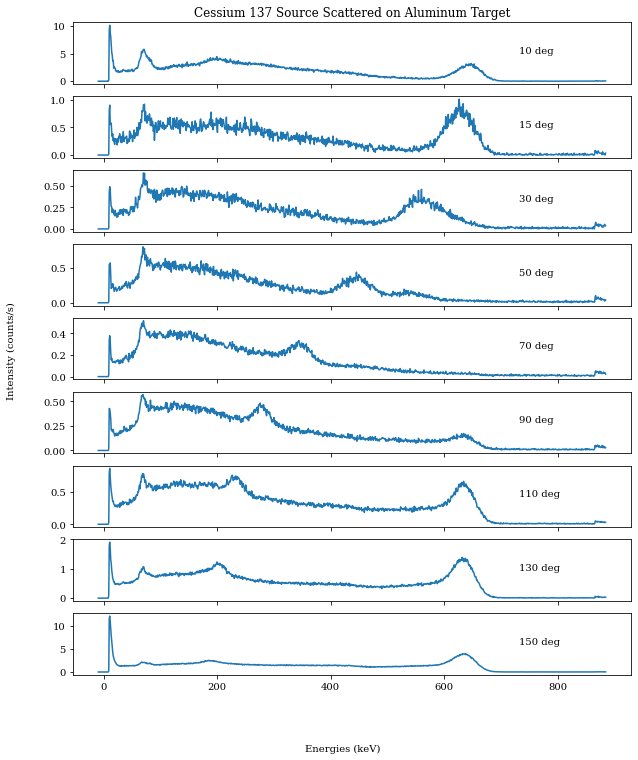

In [251]:
f, axes = plt.subplots(9, 1, sharex=True, figsize=(10,12))
axes[0].set_title('Cessium 137 Source Scattered on Aluminum Target')
# ax7.set_xlabel('Energies (keV)')
# Make common axis labels
f.text(0.5, 0.04, 'Energies (keV)', va='center', ha='center')
f.text(0.04, 0.5, 'Intensity (counts/s)', va='center', ha='center', rotation='vertical')
angles = ['10','15','30','50','70','90','110','130','150']
for i in range(len(angles)):
    axes[i].plot(bins*m+b,cs_al_dict[angles[i]]['data']/int(cs_al_dict[angles[i]]['time']))
    axes[i].annotate(angles[i]+' deg', (0.8,0.5), xycoords='axes fraction')

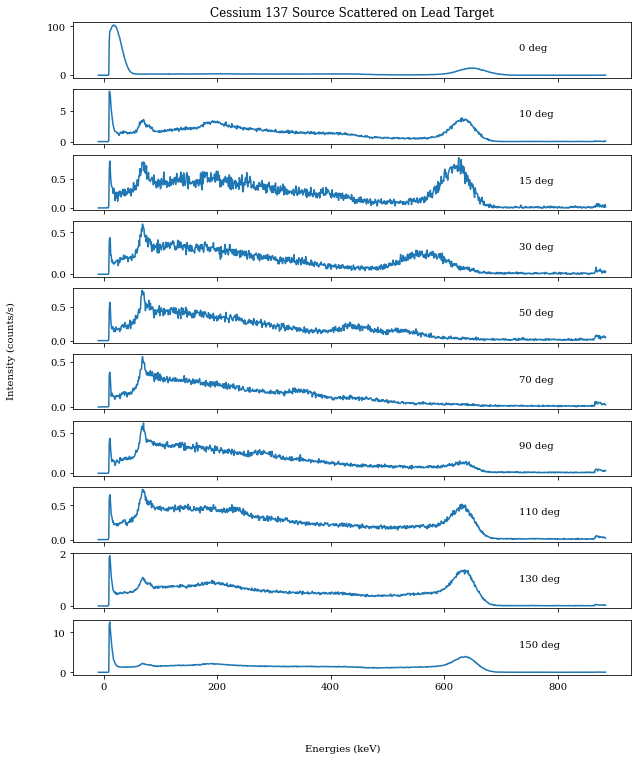

In [252]:
f, axes = plt.subplots(10, 1, sharex=True, figsize=(10,12))
axes[0].set_title('Cessium 137 Source Scattered on Lead Target')
# ax7.set_xlabel('Energies (keV)')
# Make common axis labels
f.text(0.5, 0.04, 'Energies (keV)', va='center', ha='center')
f.text(0.04, 0.5, 'Intensity (counts/s)', va='center', ha='center', rotation='vertical')
angles =['0','10','15','30','50','70','90','110','130','150']
for i in range(len(angles)):
    axes[i].plot(bins*m+b,cs_pb_dict[angles[i]]['data']/int(cs_al_dict[angles[i]]['time']))
    axes[i].annotate(angles[i]+' deg', (0.8,0.5), xycoords='axes fraction')

area:  33593.0 peak energy:  728.0 peak index:  227 std 10.920654150203164
24352.0007406935 728.9756154645291 30.097461768576498 -0.2919536349111687 218.21718321587804
708.1019652003911 0.47617143675170576 0.6535317857478735 0.026952892460843984 15.710370025392729


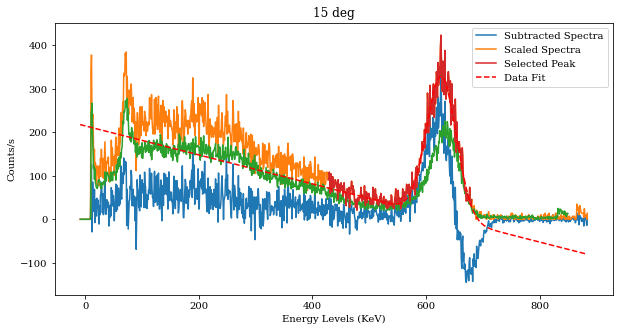

area:  9730.2 peak energy:  652.0 peak index:  151 std 12.323769011721936
11522.644405288002 649.6330328734416 34.08013534236532 -0.15310726945212355 87.49764437600793
301.38891957362114 0.6798665224854802 0.7657649818681185 0.010355934058308898 5.916992523160104


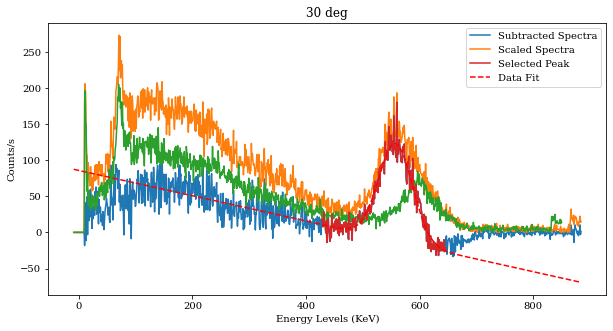

area:  13226.000000000005 peak energy:  521.0 peak index:  120 std 9.941701519937679
7171.250236152321 521.1334349234097 27.38562295526902 -0.035135716663353384 41.29094045190815
233.32466517666677 0.7730808753777353 0.819827026732854 0.010319336891117522 5.7266578578502365


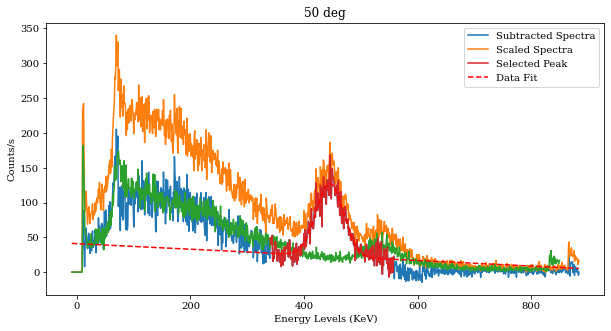

area:  13261.0 peak energy:  403.0 peak index:  102 std 10.379761169247509
6351.19848849482 408.0014075149373 20.467803281380096 -0.20566468359574686 114.31551518398655
240.47833440803947 0.705099774178419 0.7416015288316494 0.01398445431571947 6.672863013146432


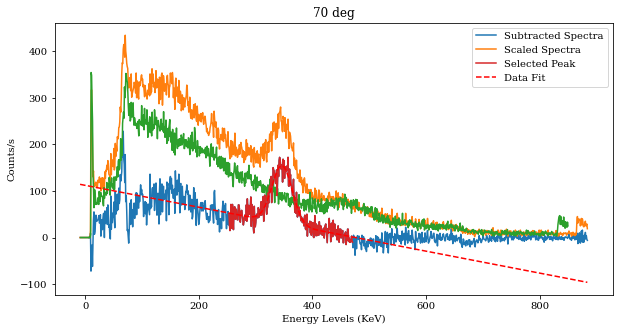

area:  20605.0 peak energy:  327.0 peak index:  126 std 7.951222999936517
5890.641641146131 330.1164958446595 15.456067426252734 -0.2799787834913785 149.02419384477363
235.39736978030976 0.6129483270516498 0.6310542270033408 0.017291137779887493 6.239493232070462


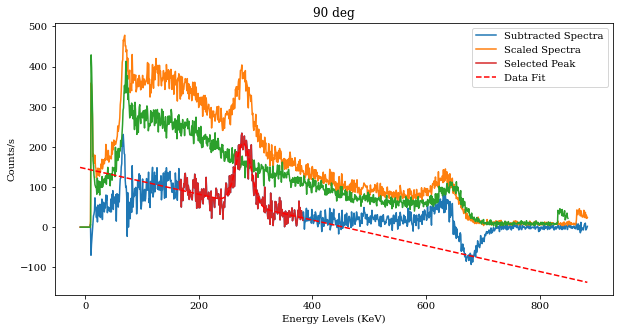

area:  34938.0 peak energy:  283.0 peak index:  132 std 6.137701517051296
5761.313424156547 278.5099055137974 11.973019060100915 -0.47649650549958805 246.87425640464667
271.2237043681832 0.5824559267425693 0.5920432578114684 0.0232805386890786 7.119758988945397


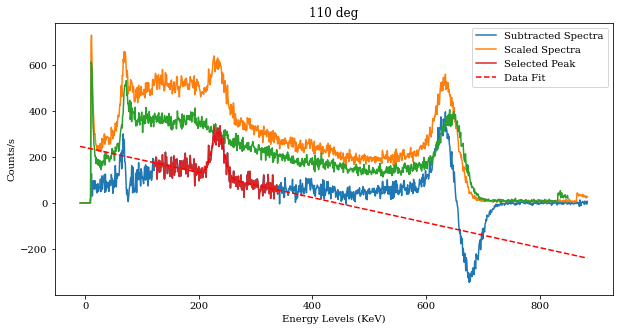

In [281]:
%matplotlib inline
bins = np.linspace(1,1023,1023)
al_data = []

for angle in ['15','30','50','70','90','110']:
    entry = cs_al_dict[angle]

    scale = int(calibrations[angle]['time']) / int(entry['time']) 
    # scale = 377 / 110
    scaled_data = entry['data'] * scale
    bg = calibrations[angle]['data']

    x1 = entry['x1']
    x2 = entry['x2']

    input_x = bins
    # input_y = entry['data']
    if angle in ['10','15']:
        input_y = scaled_data
    else:    
        input_y = scaled_data - bg

    # Select peak to fit
    xdata = input_x[x1:x2]
    ydata = input_y[x1:x2]

    # Plot input spectra with correct scaling
    plt.figure(figsize=(10,5))
    plt.plot(input_x*m+b,scaled_data - bg, label='Subtracted Spectra')
    plt.plot(input_x*m+b,scaled_data, label='Scaled Spectra')
    plt.plot(input_x*m_new+b_new, bg)
    # Plot selected peak to fit
    plt.plot(xdata*m+b, ydata, label='Selected Peak')

    poissonErr = np.sqrt(scaled_data[x1:x2])
    [A,wc,g,m0,y0],pcov = gaussFit(xdata, ydata, poissonErr)
    # [A_bg,w_bgc,g_bg,m0_bg,y0_bg],pcov_bg = gaussFit(xdata, bg, np.sqrt(bg[x1:x2]))

    # offset, amplitude, center, sigma
    [A_err,wc_err,g_err,m0_err,y0_err] = np.sqrt(np.diag(pcov))
    print(A,wc,g,m0,y0)
    print(A_err,wc_err,g_err,m0_err,y0_err)


    # Plot fitted gaussian to peak
    plt.plot(input_x*m+b,gaussProfile(input_x,A,wc,g,m0,y0), '--r', label='Data Fit')
    # plt.plot(input_x*m_new+b_new,gaussProfile(input_x,A_bg,w_bgc,g_bg,m0_bg,y0_bg), '--k', label='Bg Fit')
    # plt.annotate(f'Mean={round(x0*m+b,2)}keV, $\sigma$={round(sigma,2)}, Amplitude={round(A,2)}counts/s',(0.2,0.5), xycoords='figure fraction')
    plt.legend()
    plt.title(angle + ' deg')
    plt.xlabel('Energy Levels (KeV)')
    plt.ylabel('Counts/s')
    plt.show()

    al_data.append(np.array([int(angle),int(cs_pb_dict[angle]['time']),A,wc*m+b,g,m0,y0,A_err,wc_err,g_err,m0_err,y0_err]))



In [282]:
angles_cs_al, times_cs_al,As_cs_al, shifts_cs_al, sigmas_cs_al, m0s_cs_al, y0s_cs_al, As_err_cs_al,shifts_err_cs_al, sigmas_err_cs_al ,m0s_err_cs_al, y0s_err_cs_al,= np.transpose(np.array(al_data))


In [255]:
%matplotlib qt
plt.figure()
plt.plot(1-np.cos(np.radians(angles_cs_al)), 1/(shifts_cs_al),'o')
plt.xlabel('Angles')
plt.ylabel('1/E')
plt.title('Cesium Source Aluminum Scattering Target')

Text(0.5, 1.0, 'Cesium Source Aluminum Scattering Target')

In [256]:
plt.figure(figsize=(10,5))
plt.errorbar(angles_cs_al, shifts_cs_al,yerr=shifts_err_cs_al,fmt='o', markersize = 10, label='Aluminum',alpha = 0.7)
plt.errorbar(angles_cs_pb, shifts_cs_pb,yerr=shifts_err_cs_pb,fmt='o', markersize = 10, label='Lead',alpha=0.7)
plt.xlabel('Angles (degrees)')
plt.ylabel('Peak Energy (keV)')
plt.title('Cesium Source Scattering')
plt.legend()
plt.tight_layout()

#### Compare to theoretical value

In [238]:
%matplotlib qt
plt.rcParams.update({'font.size': 40})
plt.rcParams["font.family"] = "serif"

In [259]:
plt.errorbar(angles_cs_al, shifts_cs_al,yerr = np.sqrt(shifts_cs_al),fmt='o',markersize = 5, label = 'Data')

<ErrorbarContainer object of 3 artists>

In [293]:
mass_of_electron = 9.10938356e-31 #kg
speed_of_light = 299792458 #m/s
E0 = 662 #keV
keV = 1000 * 1.602176634e-19 #kg m^2/s^2 = J

thetas = np.linspace(0,180,180)
calculated_shifts = 1 / (E0*keV) + 1 / (mass_of_electron *  speed_of_light ** 2) * (1-np.cos(np.radians(thetas)))

m_cs_al,b_cs_al = np.polyfit(1-np.cos(np.radians(angles_cs_al)), 1/(shifts_cs_al), 1)

plt.figure(figsize=(10,5))
plt.errorbar(1-np.cos(np.radians(angles_cs_al)), 1/(shifts_cs_al),yerr=(shifts_err_cs_al/shifts_cs_al**2),fmt='o',markersize = 10,label='Data')
plt.plot(1-np.cos(np.radians(thetas)), calculated_shifts * keV, label = 'Theoretical Values')
plt.plot(1-np.cos(np.radians(thetas)), (1-np.cos(np.radians(thetas)))*m_cs_al+b_cs_al, '--', label = 'Data Fit')
plt.xlabel(r'1-cos$\theta$')
plt.ylabel(r'1/E (keV$^{-1}$)')
plt.annotate('Fitted Slope = %4f keV$^{-1}$'%(m_cs_al),(0.6,0.002))
plt.title('Cesium Source Aluminum Scattering Target')
plt.legend()
plt.tight_layout()

# Cross Section

In [275]:
re = 2.818e-13 #cm classical radiums of the electron
keV_g = 1.602176634e-9 #g cm^2/s^2 = erg
speed_of_light_cm = 29979245800 #cm/s
mass_of_electron = 9.10938356e-31 #kg
mass_of_electron_g = 9.10938356e-28 #kg
# plank = 6.62607004e-34
compton_wavelength = 2.42631023867e-12 #m
compton_wavelength_cm = 2.42631023867e-10 #cm


r = 25.5 #cm, distance from target to detector
h_target = 7.7 #cm
d_target = 1.9 #cm
crystal_area = 5.08 * 5.08 #cm**2

N0 = 6e23 #Avogadro's number
# What is the Cs's Currie?
I0 = 3.7e10 * 3.69e-3 / (4 * np.pi * r**2) # 1/(cm^2 s)

A_al = 26.9 #atomic weight of aluminum
A_pb = 207.2 #atomic weight of Lead
Z_al = 13 #atomic number of aluminum
Z_pb = 82 #atomic number of Lead

rho_al = 2.7 #g/cm^3
rho_pb = 11.35 #g/cm^3

N_al = np.pi * ( d_target / 2) **2 * h_target * rho_al * N0 / A_al * Z_al
N_pb = np.pi * ( d_target / 2) **2 * h_target * rho_pb * N0 / A_pb * Z_pb


In [276]:
def Klein_Nishina(E0, theta):
    a = E0 * keV_g / (mass_of_electron_g *  speed_of_light_cm ** 2) # should be 1.29 for 662 keV
    cos = np.cos(np.radians(theta))
    return (re ** 2) * ((1+cos**2) / 2) * ( 1 / (1 + a * (1-cos)) **2 ) * (1 + a**2*(1-cos)**2 / (1+cos**2) / (1 + a*(1-cos)))

def Klein_Nishina_Etheta(E0, E_theta, theta):
    PE = E_theta/E0
    return 1 / 2 * re ** 2 * PE ** 2 * (  PE + 1/PE - np.sin(np.radians(theta)) ** 2)

def Compton_Energy(E0, theta):
    return 1 / (E0) + 1 / (mass_of_electron_g *  speed_of_light_cm ** 2) * (1-np.cos(np.radians(theta)))


#### Theoretical values using Klein-Nishina

In [233]:
%matplotlib qt
plt.rcParams.update({'font.size': 20})
plt.rcParams["font.family"] = "serif"

In [234]:
shifts_cs_al

array([627.14118814, 557.85114137, 445.52210082, 346.62675565,
       278.54298308, 233.43063355])

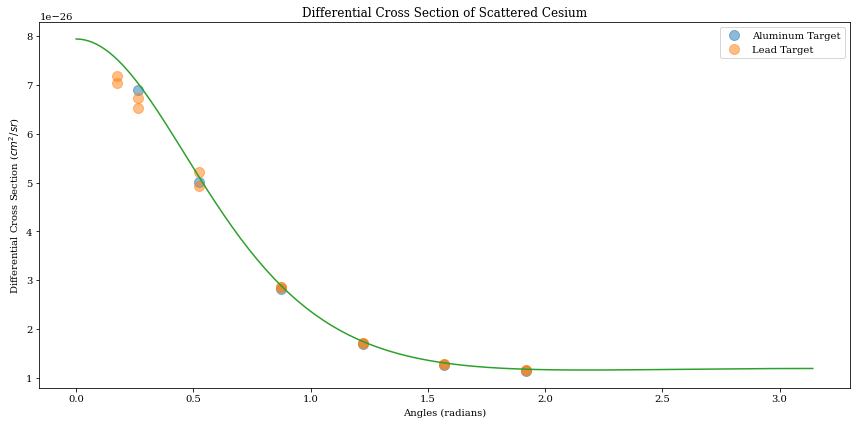

In [246]:
# %matplotlib inline
thetas = np.linspace(0,180,180)
diff_cross_secs = Klein_Nishina(662, thetas)

# plt.figure(figsize=(20,10))
plt.figure(figsize=(12,6))
plt.plot(np.radians(angles_cs_al), Klein_Nishina_Etheta(662, shifts_cs_al , angles_cs_al),'o',markersize = 10, alpha=0.5, label = 'Aluminum Target')
plt.plot(np.radians(angles_cs_pb), Klein_Nishina_Etheta(662, shifts_cs_pb , angles_cs_pb),'o',markersize = 10, alpha=0.5,label = 'Lead Target' )
plt.plot(np.radians(thetas), diff_cross_secs)

plt.title('Differential Cross Section of Scattered Cesium')
plt.xlabel('Angles (radians)')
plt.ylabel('Differential Cross Section ($cm^2/sr$)')
plt.legend()
plt.tight_layout()
# plt.plot(thetas, 1 / E_thetas,'o')

#### Measured Values

In [245]:
1/ ( (crystal_area / r ** 2) * N_al * I0)

8.823099475327666e-29

In [277]:
As_err_cs_al

array([1878.22397988,  708.1019652 ,  301.38891957,  233.32466518,
        240.47833441,  235.39736978,  271.22370437])

In [289]:
np.mean(np.array(As_cs_al) / Klein_Nishina_Etheta(662, shifts_cs_al , angles_cs_al))
np.mean(np.array(As_cs_pb) / Klein_Nishina_Etheta(662, shifts_cs_pb , angles_cs_pb))

2.658616681221603e+29

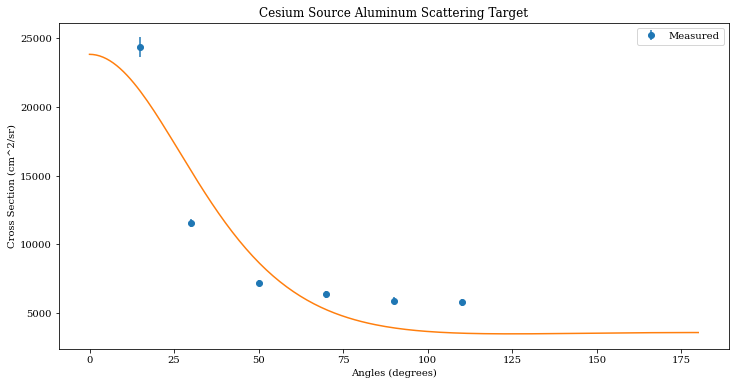

In [288]:
%matplotlib inline

plt.figure(figsize=(12,6))
# plt.plot(angles_cs_al,np.array(As_cs_al)/As_cs_al[0] / ( (crystal_area / r ** 2) * N_al * I0),'o',label='Measured')
plt.errorbar(angles_cs_al,np.array(As_cs_al),yerr=As_err_cs_al,fmt='o',label='Measured')
# plt.plot(angles_cs_al, Klein_Nishina_Etheta(662, shifts_cs_al , angles_cs_al)*3.2e+29,'o',markersize = 10, alpha=0.5, label = 'Klein-Nishina')
# plt.figure()
plt.plot(thetas, diff_cross_secs*3e29)

plt.xlabel('Angles (degrees)')
plt.ylabel('Cross Section (cm^2/sr)')
plt.title('Cesium Source Aluminum Scattering Target')
plt.legend()



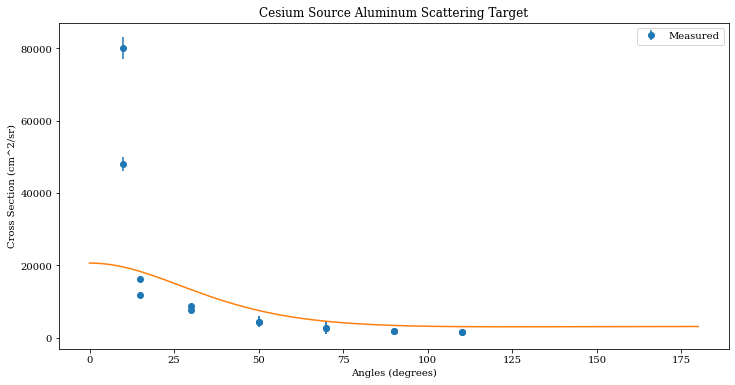

In [290]:
%matplotlib inline

plt.figure(figsize=(12,6))
# plt.plot(angles_cs_al,np.array(As_cs_al)/As_cs_al[0] / ( (crystal_area / r ** 2) * N_al * I0),'o',label='Measured')
plt.errorbar(angles_cs_pb,np.array(As_cs_pb),yerr=As_err_cs_pb,fmt='o',label='Measured')
# plt.plot(angles_cs_al, Klein_Nishina_Etheta(662, shifts_cs_al , angles_cs_al)*3.2e+29,'o',markersize = 10, alpha=0.5, label = 'Klein-Nishina')
# plt.figure()
plt.plot(thetas, diff_cross_secs*2.6e29)

plt.xlabel('Angles (degrees)')
plt.ylabel('Cross Section (cm^2/sr)')
plt.title('Cesium Source Aluminum Scattering Target')
plt.legend()



In [221]:
%matplotlib inline

plt.figure(figsize=(12,6))
# plt.plot(angles_cs_al,np.array(As_cs_al)/As_cs_al[0] / ( (crystal_area / r ** 2) * N_al * I0),'o',label='Measured')
plt.errorbar(angles_cs_al,np.array(As_cs_al),yerr=As_err_cs_al,fmt='o',label='Measured')
plt.xlabel('Angles (degrees)')
plt.ylabel('Cross Section (cm^2/sr)')
plt.title('Cesium Source Aluminum Scattering Target')
plt.legend()
plt.tight_layout()

# plt.figure(figsize=(10,5))
# plt.plot(angles_cs_al, Klein_Nishina_Etheta(662, shifts_cs_al , angles_cs_al),'o',markersize = 10, alpha=0.5, label = 'Klein-Nishina')
# plt.xlabel('Angles (degrees)')
# plt.ylabel('Cross Section (cm^2/sr)')
# plt.title('Cesium Source Aluminum Scattering Target')
# plt.legend()


plt.figure(figsize=(12,6))
# plt.plot(angles_cs_pb,np.array(As_cs_pb) /As_cs_pb[0] / ((crystal_area / r ** 2) * N_pb * I0),'o',label='Measured')
plt.errorbar(angles_cs_pb,np.array(As_cs_pb),yerr=As_err_cs_pb,fmt='o',label='Measured')
# plt.plot(thetas, diff_cross_secs)
plt.xlabel('Angles (degrees)')
plt.ylabel('Cross Section (cm^2/sr)')
plt.title('Cesium Source Lead Scattering Target')
plt.legend()
plt.tight_layout()


# plt.figure(figsize=(10,5))
# plt.plot(angles_cs_pb, Klein_Nishina_Etheta(662, shifts_cs_pb , angles_cs_pb),'o',markersize = 10, alpha=0.5,label = 'Klein-Nishina' )
# # plt.plot(thetas, diff_cross_secs)
# plt.xlabel('Angles (degrees)')
# plt.ylabel('Cross Section (cm^2/sr)')
# plt.title('Cesium Source Lead Scattering Target')
# plt.legend()

[1050.8508087515488,
 141.27680739010123,
 31.91553977651065,
 18.129767919321225,
 9.355474279302785,
 4.463538691287209,
 4.113057393290237,
 2.5847410852455677]